# Sarah's Auto MPG Data Set

**Author:** Sarah Howard 

**Date:** April 20, 2025

**Objective:** Training a regression model to predict fuel efficency based on engine specs and weight.

## Introduction

Using the UCI Auto MPG Dataset, I will be training a model to predict how many miles per gallon a vehicle will use based on engine specs and weight.

## Imports
In the code cell below, import the necessary Python libraries for this notebook. 

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, silhouette_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer


## Section 1. Import and Inspect the Data

### 1.1 Load the UCI Auto-mpg dataset and confirm it’s structured correctly

In [192]:
# Load the UCI auto=-mpg dataset from Projects Regression (Final) Data folder
df = pd.read_csv(r"C:\Projects\applied-ml-showard\regression\auto-mpg.csv", delimiter=",")

# Display info
df.info()

# Display the first 10 rows
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


### 1.2 Display basic summary statistics

In [193]:
# Check for missing statistics
df.isnull().values.any()

np.False_

In [194]:
# Display summary statistics
print(df.describe())

              mpg   cylinders  displacement       weight  acceleration  \
count  398.000000  398.000000    398.000000   398.000000    398.000000   
mean    23.514573    5.454774    193.425879  2970.424623     15.568090   
std      7.815984    1.701004    104.269838   846.841774      2.757689   
min      9.000000    3.000000     68.000000  1613.000000      8.000000   
25%     17.500000    4.000000    104.250000  2223.750000     13.825000   
50%     23.000000    4.000000    148.500000  2803.500000     15.500000   
75%     29.000000    8.000000    262.000000  3608.000000     17.175000   
max     46.600000    8.000000    455.000000  5140.000000     24.800000   

       model year      origin  
count  398.000000  398.000000  
mean    76.010050    1.572864  
std      3.697627    0.802055  
min     70.000000    1.000000  
25%     73.000000    1.000000  
50%     76.000000    1.000000  
75%     79.000000    2.000000  
max     82.000000    3.000000  


### Reflection 1: 

**What do you notice about the dataset?**<br>
I am finding it interesting that the mean of cyclinders is 5.454774, but the 25% and 50% are 4 cyclinders. I also am finding difference between the mean and the 50% mark for displacement to be interesting.
 
**Are there any data issues?**<br>
The data appears to be complete and does not have missing values. I am not sure what the origin column is representing.

## Section 2. Data Exploration and Preparation

### 2.1 Explore data patterns and distributions

#### Scatter matrixes

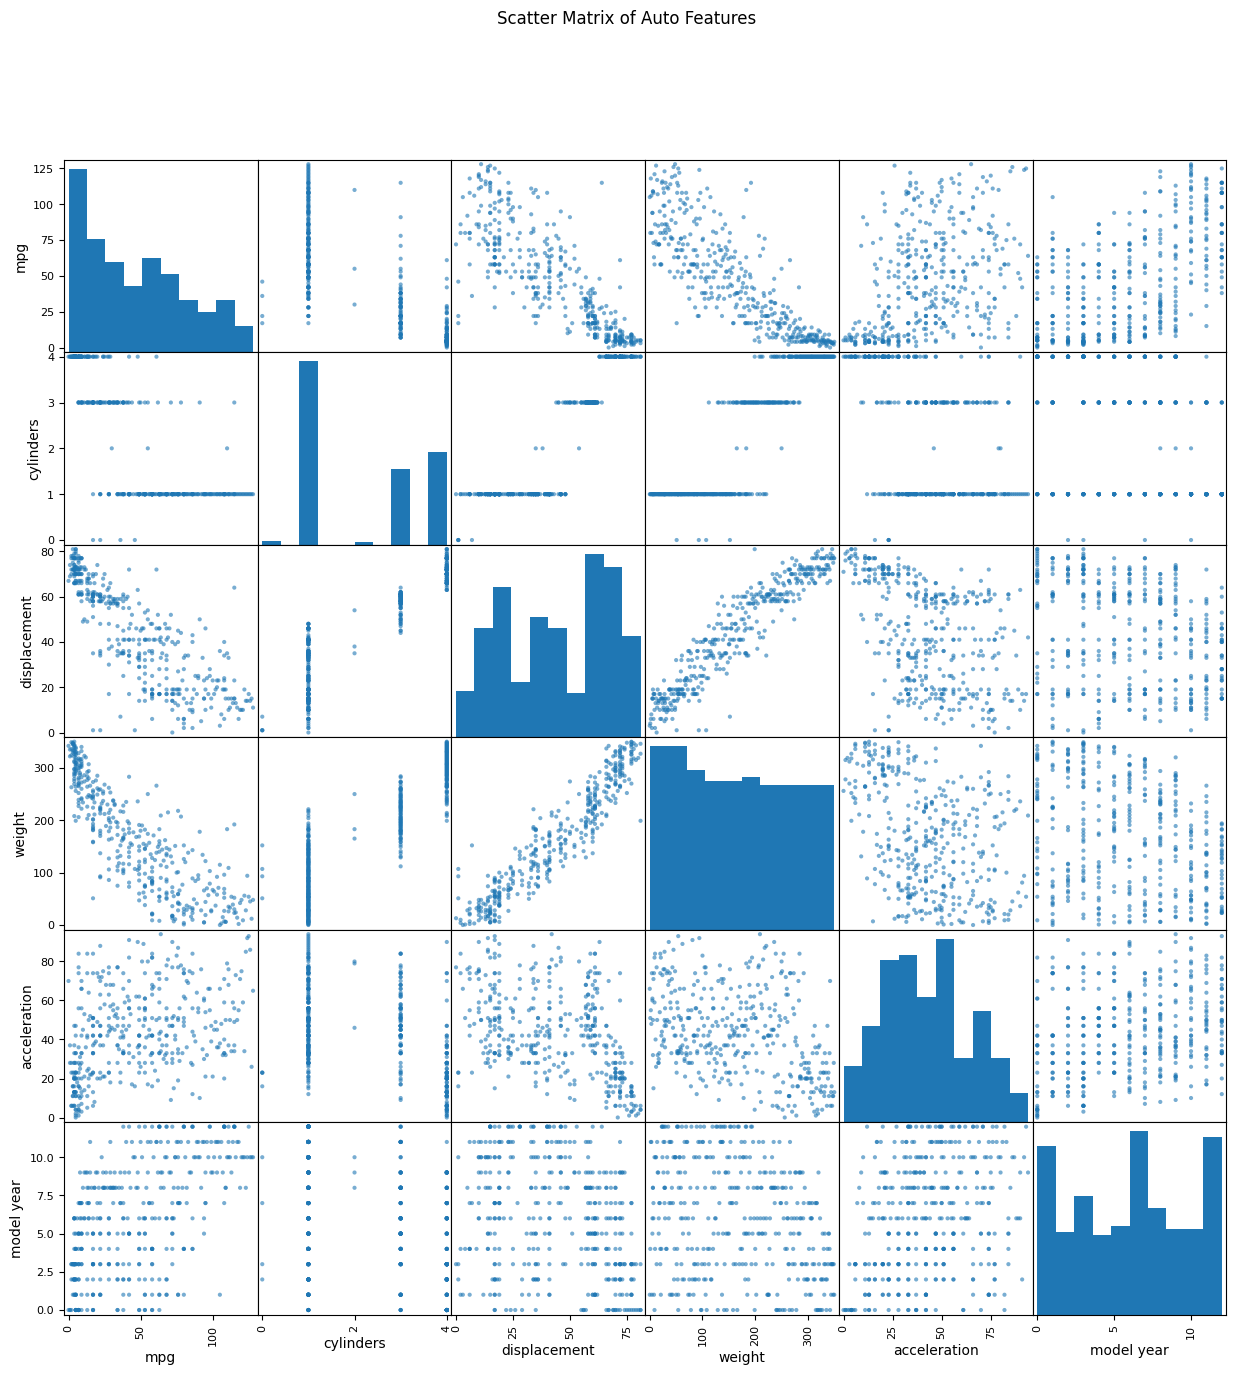

In [195]:
# Use a scatter matrix to visualize feature relationships and distributions:
# List of attributes you want to plot
attributes = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year']

# Create a copy of the relevant columns
df_subset = df[attributes].copy()

# Encode all categorical columns to numeric
for col in df_subset.columns:
    le = LabelEncoder()
    df_subset[col] = le.fit_transform(df_subset[col])

# Plot the scatter matrix
scatter_matrix(df_subset, figsize=(15, 15), diagonal='hist', alpha=0.6)
plt.suptitle("Scatter Matrix of Auto Features")
plt.show()

#### Histograms

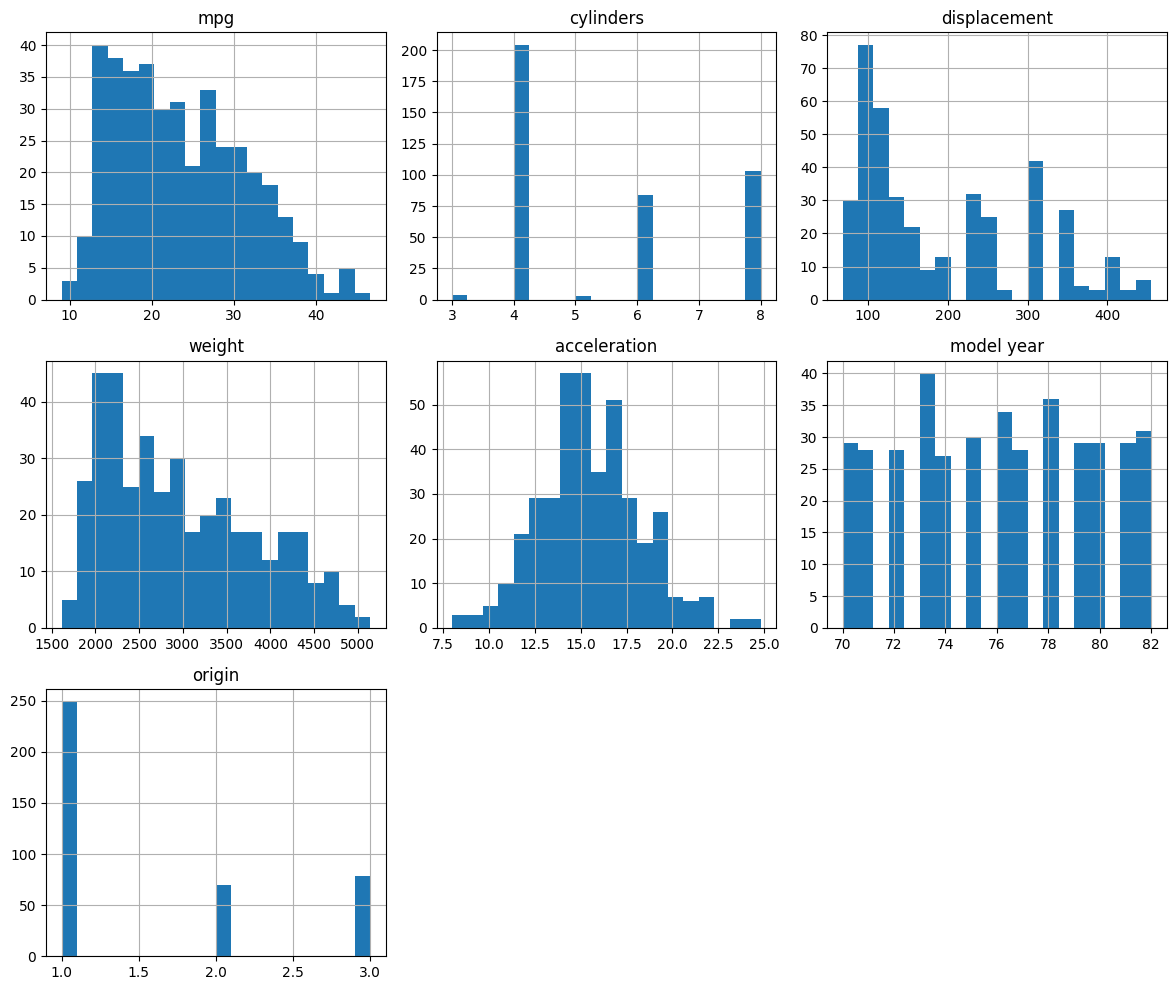

In [196]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

Boxplots

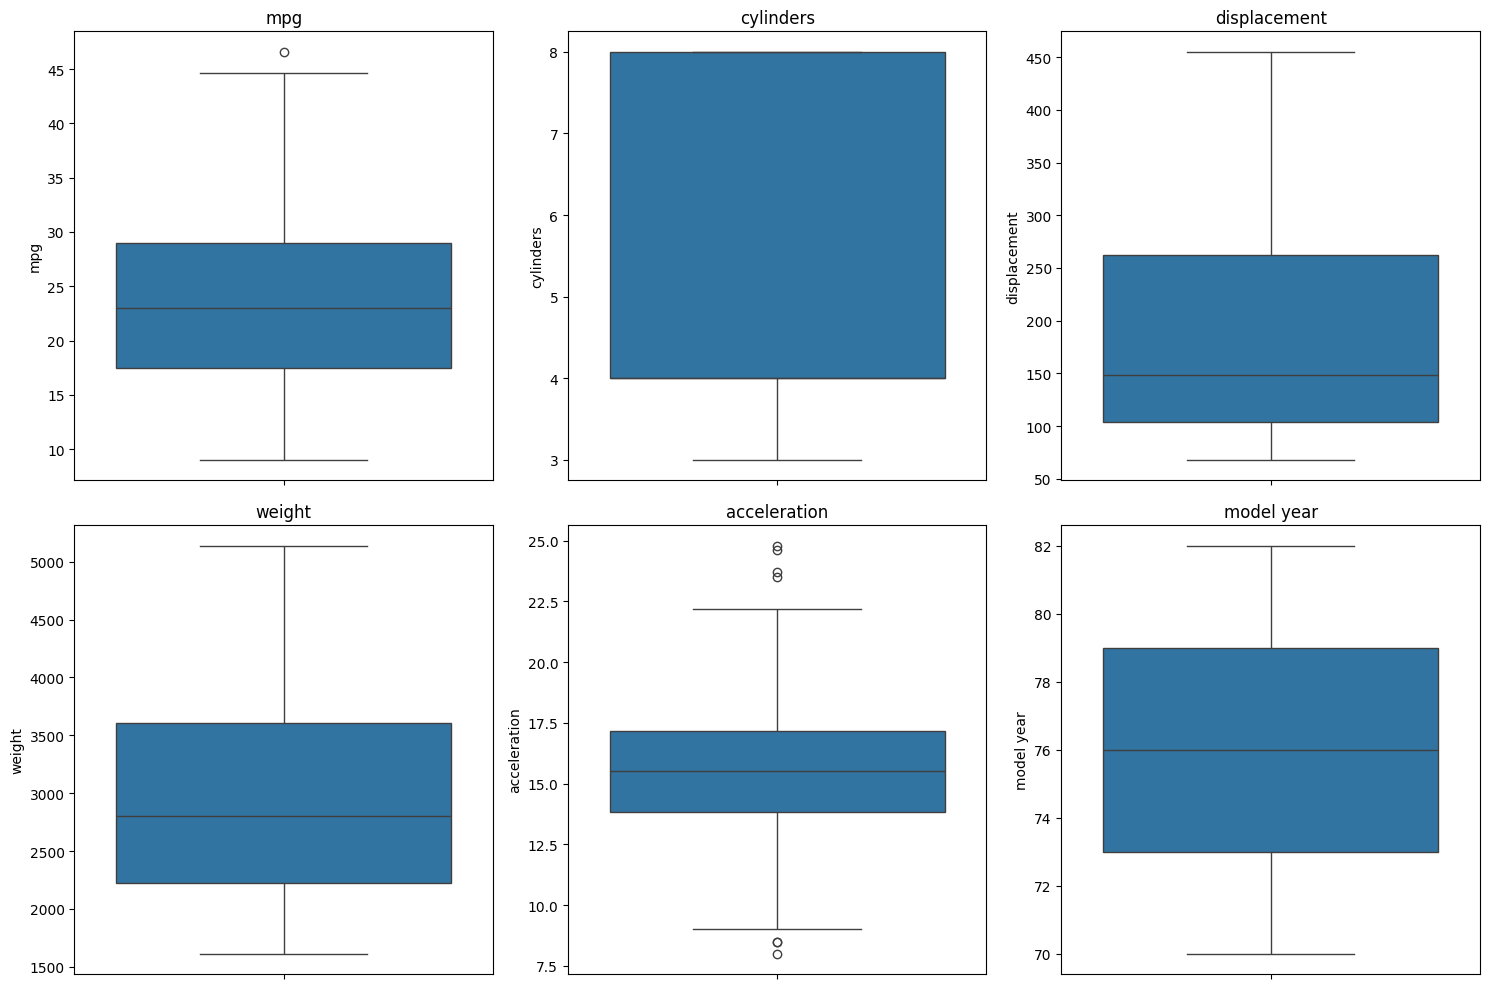

In [197]:
attributes = ['mpg', 'cylinders', 'displacement', 'weight', 'acceleration', 'model year']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, attr in enumerate(attributes):
    row = i // 3
    col = i % 3
    sns.boxplot(y=df[attr], ax=axes[row][col])
    axes[row][col].set_title(f'{attr}')
    axes[row][col].set_ylabel(attr)

plt.tight_layout()
plt.show()

Count plots

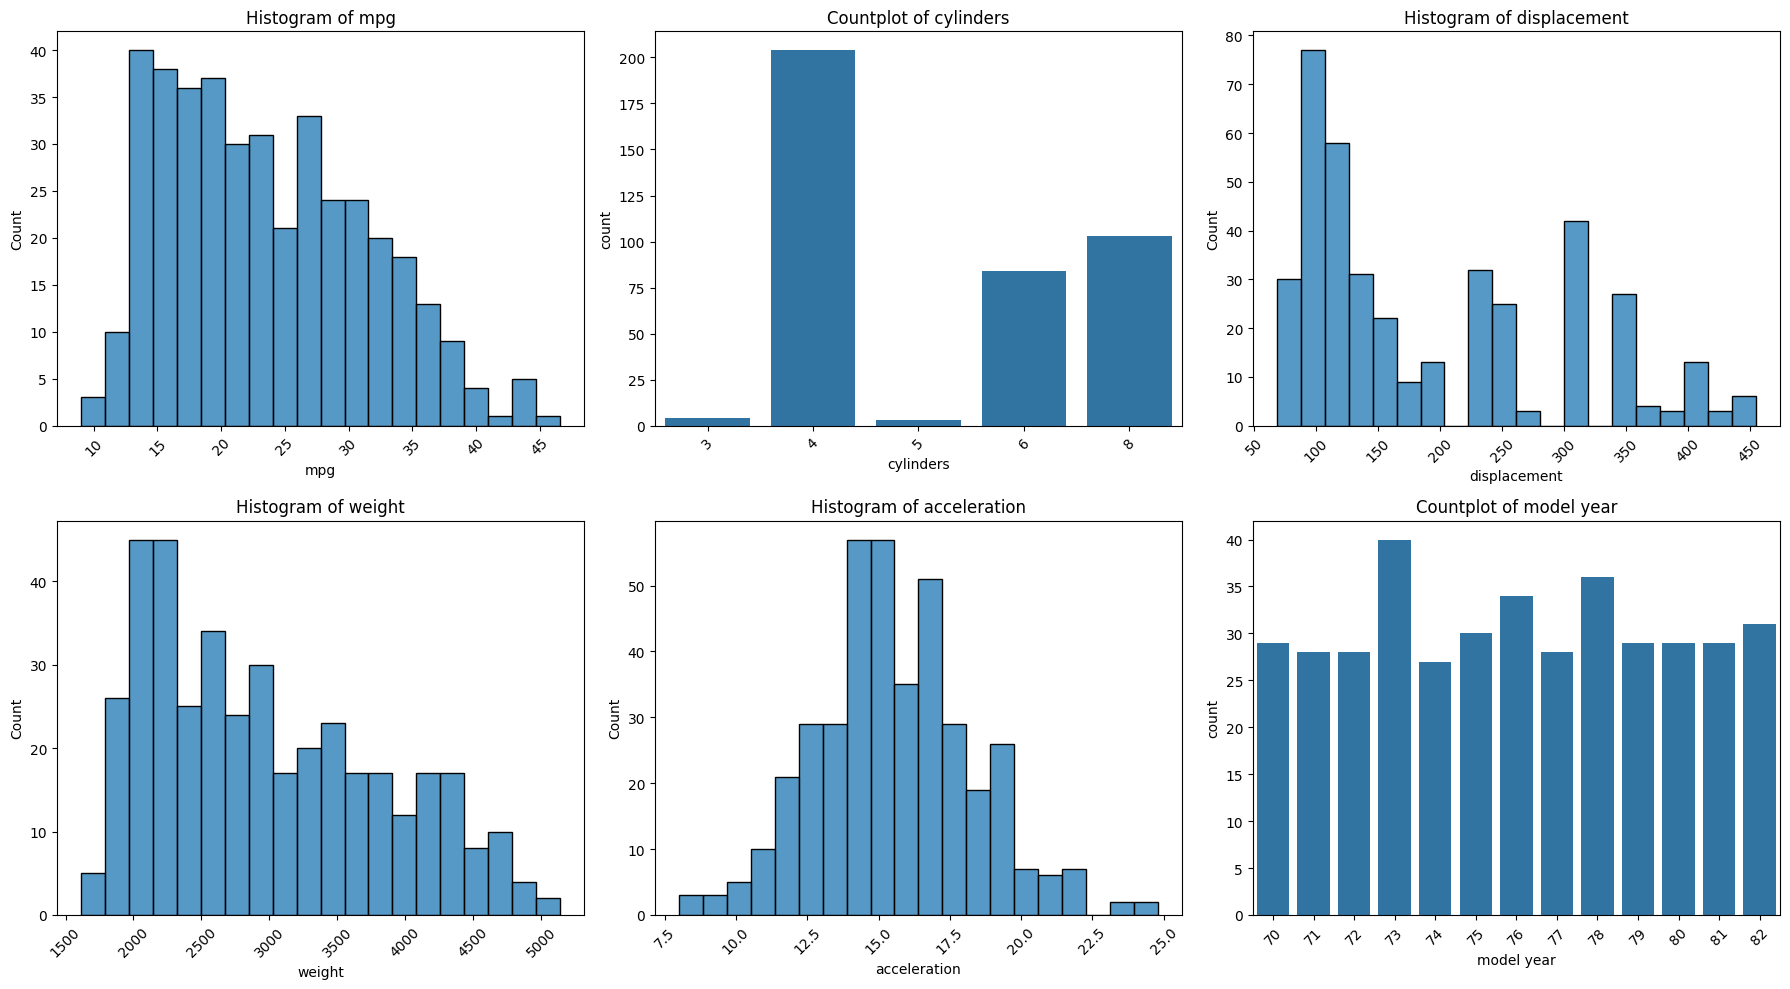

In [198]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

for i, attr in enumerate(attributes):
    row = i // 3
    col = i % 3
    # For continuous attributes, use binning by converting to category
    if df[attr].nunique() > 20:
        sns.histplot(df[attr], bins=20, ax=axes[row][col])
        axes[row][col].set_title(f'Histogram of {attr}')
    else:
        sns.countplot(x=df[attr], ax=axes[row][col])
        axes[row][col].set_title(f'Countplot of {attr}')
    axes[row][col].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.2 Cleaning the data

#### Removing outliers

In [199]:
df_clean = df.copy()

for attr in attributes:
    Q1 = df_clean[attr].quantile(0.25)
    Q3 = df_clean[attr].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out outliers
    df_clean = df_clean[(df_clean[attr] >= lower_bound) & (df_clean[attr] <= upper_bound)]

print(f"Original rows: {df.shape[0]}")
print(f"Cleaned rows: {df_clean.shape[0]}")

Original rows: 398
Cleaned rows: 387


#### Convert horsepower to numeric and drop missing values

In [200]:
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['horsepower'].isna().sum()
df = df.dropna(subset=['horsepower'])

### Encode the dataset from categorical to numerical

In [202]:
# Encode the car name attribute
df['car_name_original'] = df['car name']

label_encoder = LabelEncoder()
df['car_name_encoded'] = label_encoder.fit_transform(df['car_name_original'])

df[['car_name_original', 'car_name_encoded']].head()

mapping_df = pd.DataFrame({
    'car_name_original': label_encoder.classes_,
    'car_name_encoded': range(len(label_encoder.classes_))
})

print(mapping_df)


           car_name_original  car_name_encoded
0    amc ambassador brougham                 0
1         amc ambassador dpl                 1
2         amc ambassador sst                 2
3                amc concord                 3
4            amc concord d/l                 4
..                       ...               ...
296       vw dasher (diesel)               296
297                vw pickup               297
298                vw rabbit               298
299     vw rabbit c (diesel)               299
300         vw rabbit custom               300

[301 rows x 2 columns]


### 2.3 Feature selection and engineering

#### Create a new category with model year and car name

In [203]:
# Step 1: Ensure 'model year' is numeric
df['model year'] = pd.to_numeric(df['model year'], errors='coerce')

# Step 2: Create the full year (assume 1900s — or change logic if needed)
df['full_year'] = df['model year'].astype(int) + 1900

# Step 3: Combine with car name
df['model_year_full'] = df['car name'].astype(str) + ' ' + df['full_year'].astype(str)

df[['car name', 'model year', 'model_year_full']].head()

,car name,model year,model_year_full
0,chevrolet chevelle malibu,70,chevrolet chevelle malibu 1970
1,buick skylark 320,70,buick skylark 320 1970
2,plymouth satellite,70,plymouth satellite 1970
3,amc rebel sst,70,amc rebel sst 1970
4,ford torino,70,ford torino 1970


In [210]:
# Encode the model_year_full attribute
df['model_year_full_original'] = df['model_year_full']

label_encoder = LabelEncoder()
df['model_year_full_encoded'] = label_encoder.fit_transform(df['model_year_full_original'])

df[['model_year_full_original', 'model_year_full_encoded']].head()

mapping2_df = pd.DataFrame({
    'model_year_full_original': label_encoder.classes_,
    'model_year_full_encoded': range(len(label_encoder.classes_))
})

print(mapping2_df)

         model_year_full_original  model_year_full_encoded
0    amc ambassador brougham 1973                        0
1         amc ambassador dpl 1970                        1
2         amc ambassador sst 1972                        2
3                amc concord 1978                        3
4                amc concord 1980                        4
..                            ...                      ...
385                vw pickup 1982                      385
386                vw rabbit 1976                      386
387                vw rabbit 1980                      387
388     vw rabbit c (diesel) 1980                      388
389         vw rabbit custom 1979                      389

[390 rows x 2 columns]


### Reflection 2:

**What patterns or anomalies do you see? Do any features stand out?**<br>
Displacement and weight appear to have a linear relationship with mpg. Cylinders and model year also appear there could be a linear relationship but there are a lot more outliers for those features. Acceleration does not have appear to have a clear pattern to it and appears more random. Horsepower also stands out as being an object when the values appear to be numeric.

**What preprocessing steps were necessary to clean and improve the data?**<br>
To clean the data, I dropped outliers that were less than the 25% percentile and over the 75th percentile. The car name feature was encoded to a numerical value.

**Did you create or modify any features to improve performance?**<br>
I created a feature that is the combination of the model year and car name. I think The combination of car name and model year will give a better results for predicting mpg than looking at either feature individually.

## Section 3. Feature Selection and Justifications

### 3.1 Choose features and targets

**Case 1 - Displacement only**

Input features: displacement

Target: mpg

**Case 2 - Weight only**

Input features: weight

Target: mpg

**Case 3 - Acceleration only**

Input features: acceleration

Target: mpg

**Case 4 - Weight and Displacement**

Input features: weight and displacement

Target: mpg

**Case 5 - Horsepower only**

Input features: horsepower

Target: mpg

**Case 6 - Model_Year_Full only**

Input features: model_year_full (car name and model year)

Target: mpg

### 3.2 Define X and y

In [205]:
# Case 1. Displacement
X1 = df[['displacement']]
y1 = df['mpg']

# Case 2. Weight
X2 = df[['weight']]
y2 = df['mpg']

# Case 3. Acceleration
X3 = df[['acceleration']]
y3 = df['mpg']

# Case 4. Weight and Displacement
X4 = df[['weight', 'displacement']]
y4 = df['mpg']

# Case 5. Horsepower
X5 = df[['horsepower']]
y5 = df['mpg']

# Case 6. Model Year Full
X6 = df[['model_year_full_encoded']]
y6 = df['mpg']

### Reflection 3: 
**Why did you choose these features?**<br>
I chose these features as I wanted to see the differences between the ones that appeared to have a clear linear relationship and the features that did not have a clear linear pattern to them.

**How might they impact predictions or accuracy?**<br>
I would expect that the features that appear to have a stronger linear relationship and fewer outliers will give better results than the ones that appear more random.

## Section 4. Train a Model (Linear Regression)

### 4.1 Split the data into training and test sets using train_test_split

In [211]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4, test_size=0.2, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y5, test_size=0.2, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y6, test_size=0.2, random_state=42)

print("Train set:", X1_train.shape, y1_train.shape)
print("Test set:", X1_test.shape, y1_test.shape)

print("Train set:", X2_train.shape, y2_train.shape)
print("Test set:", X2_test.shape, y2_test.shape)

print("Train set:", X3_train.shape, y3_train.shape)
print("Test set:", X3_test.shape, y3_test.shape)

print("Train set:", X4_train.shape, y4_train.shape)
print("Test set:", X4_test.shape, y4_test.shape)

print("Train set:", X5_train.shape, y5_train.shape)
print("Test set:", X5_test.shape, y5_test.shape)

print("Train set:", X6_train.shape, y6_train.shape)
print("Test set:", X6_test.shape, y6_test.shape)

Train set: (313, 1) (313,)
Test set: (79, 1) (79,)
Train set: (313, 1) (313,)
Test set: (79, 1) (79,)
Train set: (313, 1) (313,)
Test set: (79, 1) (79,)
Train set: (313, 2) (313,)
Test set: (79, 2) (79,)
Train set: (313, 1) (313,)
Test set: (79, 1) (79,)
Train set: (313, 1) (313,)
Test set: (79, 1) (79,)


### 4.2 Train model using Scikit-Learn model.fit() method

In [212]:
model1 = LinearRegression()
model2 = LinearRegression()
model3 = LinearRegression()
model4 = LinearRegression()
model5 = LinearRegression()
model6 = LinearRegression()

model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)
model4.fit(X4_train, y4_train)
model5.fit(X5_train, y5_train)
model6.fit(X6_train, y6_train)

print("Intercept1:", model1.intercept_)
print("Coefficients1:", model1.coef_)

print("Intercept2:", model2.intercept_)
print("Coefficients2:", model2.coef_)

print("Intercept3:", model3.intercept_)
print("Coefficients3:", model3.coef_)

print("Intercept4:", model4.intercept_)
print("Coefficients4:", model4.coef_)

print("Intercept5:", model5.intercept_)
print("Coefficients5:", model5.coef_)

print("Intercept6:", model6.intercept_)
print("Coefficients6:", model6.coef_)

Intercept1: 35.765941772604975
Coefficients1: [-0.06222756]
Intercept2: 47.200526427552106
Coefficients2: [-0.00790361]
Intercept3: 5.5150444023134995
Coefficients3: [1.16342078]
Intercept4: 44.26299382972873
Coefficients4: [-0.00560343 -0.02010615]
Intercept5: 40.606097600118346
Coefficients5: [-0.16259724]
Intercept6: 20.34746579203352
Coefficients6: [0.01686176]


### 4.3 Evalulate performance

#### Regression: R^2, MAE, RMSE

In [208]:
def evaluate_model(name, model, X_test, y_test):
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"Model: {name}")
    print(f"  R² Score: {r2:.3f}")
    print(f"  MAE     : {mae:.3f}")
    print(f"  RMSE    : {rmse:.3f}")
    print("-" * 30)

evaluate_model("Model 1", model1, X1_test, y1_test)
evaluate_model("Model 2", model2, X2_test, y2_test)
evaluate_model("Model 3", model3, X3_test, y3_test)
evaluate_model("Model 4", model4, X4_test, y4_test)
evaluate_model("Model 5", model5, X5_test, y5_test)
evaluate_model("Model 6", model6, X6_test, y6_test)

Model: Model 1
  R² Score: 0.584
  MAE     : 3.687
  RMSE    : 4.607
------------------------------
Model: Model 2
  R² Score: 0.653
  MAE     : 3.464
  RMSE    : 4.206
------------------------------
Model: Model 3
  R² Score: 0.215
  MAE     : 5.193
  RMSE    : 6.330
------------------------------
Model: Model 4
  R² Score: 0.641
  MAE     : 3.493
  RMSE    : 4.279
------------------------------
Model: Model 5
  R² Score: 0.566
  MAE     : 3.783
  RMSE    : 4.707
------------------------------
Model: Model 6
  R² Score: 0.144
  MAE     : 5.310
  RMSE    : 6.609
------------------------------


#### Results of the 6 test cases using a Regression

| Model Type | Case | Features Used | R² Score | MAE | RMSE |
|------------|------|---------------|----------|-----------|--------|
| **Regression** | Case 1 | displacement | 0.584 | 3.687 |4.607 | 48% |
|                   | Case 2 | weight | 0.653 | 3.464 | 4.206 |
|                   | Case 3 | acceleration | 0.215 | 5.193 | 6.330 |
|                   | Case 4 | weight and displacement | 0.641 | 3.493 | 4.279 |
|                   | Case 5 | horsepower | 0.566 | 3.783 | 4.707 |
|                   | Case 6 | model_year_full | 0.144 | 5.310 | 6.609 |

#### Classification: Accuracy, Precision, Recall, F1-score, Confusion Matrix

In [230]:
df['mpg_class'] = pd.qcut(df['mpg'], q=3, labels=['low', 'medium', 'high'])
features1 = ['cylinders']
features2 = ['displacement']
features3 = ['horsepower']
features4 = ['weight', 'acceleration']
features5 = ['model year']
features6 = ['origin']

X1 = df[features1]
X2 = df[features2]
X3 = df[features3]
X4 = df[features4]
X5 = df[features5]
X6 = df[features6]

y = df['mpg_class']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.2, random_state=42)
X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y, test_size=0.2, random_state=42)
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y, test_size=0.2, random_state=42)
X5_train, X5_test, y5_train, y5_test = train_test_split(X5, y, test_size=0.2, random_state=42)
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, y, test_size=0.2, random_state=42)

model1 = LogisticRegression(max_iter=1000)
model2 = LogisticRegression(max_iter=1000)
model3 = LogisticRegression(max_iter=1000)
model4 = LogisticRegression(max_iter=1000)
model5 = LogisticRegression(max_iter=1000)
model6 = LogisticRegression(max_iter=1000)

model1.fit(X1_train, y1_train)
model2.fit(X2_train, y2_train)
model3.fit(X3_train, y3_train)
model4.fit(X4_train, y4_train)
model5.fit(X5_train, y5_train)
model6.fit(X6_train, y6_train)

def evaluate_train_test_with_cm(models, X_trains, X_tests, y_trains, y_tests):
    results = []

    for i, (model, X_train, X_test, y_train, y_test) in enumerate(zip(models, X_trains, X_tests, y_trains, y_tests), 1):
        # Predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Train metrics
        train_scores = {
            "Model": f"Model {i} (Train)",
            "Accuracy": accuracy_score(y_train, y_train_pred),
            "Precision": precision_score(y_train, y_train_pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_train, y_train_pred, average='weighted', zero_division=0),
            "F1": f1_score(y_train, y_train_pred, average='weighted', zero_division=0),
            "Confusion Matrix": confusion_matrix(y_train, y_train_pred)
        }

        # Test metrics
        test_scores = {
            "Model": f"Model {i} (Test)",
            "Accuracy": accuracy_score(y_test, y_test_pred),
            "Precision": precision_score(y_test, y_test_pred, average='weighted', zero_division=0),
            "Recall": recall_score(y_test, y_test_pred, average='weighted', zero_division=0),
            "F1": f1_score(y_test, y_test_pred, average='weighted', zero_division=0),
            "Confusion Matrix": confusion_matrix(y_test, y_test_pred)
        }

        results.extend([train_scores, test_scores])

    return results

# Grouped inputs
X_trains = [X1_train, X2_train, X3_train, X4_train, X5_train, X6_train]
X_tests = [X1_test, X2_test, X3_test, X4_test, X5_test, X6_test]
y_trains = [y1_train, y2_train, y3_train, y4_train, y5_train, y6_train]
y_tests = [y1_test, y2_test, y3_test, y4_test, y5_test, y6_test]

# Run evaluation
results = evaluate_train_test_with_cm(models, X_trains, X_tests, y_trains, y_tests)

# Convert results (except confusion matrices) to a clean table
import pandas as pd

# Extract just the main metrics for table view
summary_results = [
    {k: v for k, v in res.items() if k != "Confusion Matrix"}
    for res in results
]

results_df = pd.DataFrame(summary_results)
def print_results_with_confusion_matrix(results):
    for res in results:
        print(f"\n{res['Model']}")
        print(f"Accuracy: {res['Accuracy']:.4f}")
        print(f"Precision: {res['Precision']:.4f}")
        print(f"Recall: {res['Recall']:.4f}")
        print(f"F1 Score: {res['F1']:.4f}")
        print("Confusion Matrix:")
        print(res['Confusion Matrix'])
        print("-" * 40)
print_results_with_confusion_matrix(results)


Model 1 (Train)
Accuracy: 0.6901
Precision: 0.7001
Recall: 0.6901
F1 Score: 0.6774
Confusion Matrix:
[[105   0   5]
 [  1  76  31]
 [ 54   6  35]]
----------------------------------------

Model 1 (Test)
Accuracy: 0.6329
Precision: 0.7043
Recall: 0.6329
F1 Score: 0.6076
Confusion Matrix:
[[21  0  0]
 [ 1 18  4]
 [21  3 11]]
----------------------------------------

Model 2 (Train)
Accuracy: 0.7476
Precision: 0.7474
Recall: 0.7476
F1 Score: 0.7455
Confusion Matrix:
[[89  1 20]
 [ 1 94 13]
 [36  8 51]]
----------------------------------------

Model 2 (Test)
Accuracy: 0.6582
Precision: 0.7035
Recall: 0.6582
F1 Score: 0.6444
Confusion Matrix:
[[19  0  2]
 [ 1 19  3]
 [17  4 14]]
----------------------------------------

Model 3 (Train)
Accuracy: 0.7412
Precision: 0.7546
Recall: 0.7412
F1 Score: 0.7449
Confusion Matrix:
[[89  2 19]
 [ 3 79 26]
 [21 10 64]]
----------------------------------------

Model 3 (Test)
Accuracy: 0.6835
Precision: 0.6994
Recall: 0.6835
F1 Score: 0.6855
Confusion 

#### Results of the 6 test cases using a Decision Tree for the Training Data

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | displacement | 69.01% | 70.01% |69.01% | 67.74% | Used the weighted average | 
|                   | Case 2 | weight | 74.76% | 74.74% | 74.76% | 74.55% | Used the weighted average |
|                   | Case 3 | acceleration | 74.12% | 75.46% | 74.12% | 74.49% | Used the weighted average|
|                   | Case 4 | weight and displacement | 75.40% | 75.25% | 75.40% | 75.31% | Used the weighted average|
|                   | Case 5 | horsepower | 54.31% | 49.66% | 54.31% | 49.23% | Used the weighted average|
|                   | Case 6 | model_year_full | 57.19% | 41.36% | 57.19% | 46.91% | Used the weighted average|

#### Results of the 6 test cases using a Decision Tree for the Test Data

| Model Type | Case | Features Used | Accuracy | Precision | Recall | F1-Score | Notes |
|------------|------|---------------|----------|-----------|--------|-----------|-------|
| **Decision Tree** | Case 1 | displacement | 63.29% | 70.43% | 63.29% | 60.76% | Used the weighted average | 
|                   | Case 2 | weight | 65.82% | 70.35% | 65.82% | 64.44% | Used the weighted average |
|                   | Case 3 | acceleration | 68.35% | 69.94% | 68.35% | 68.55% | Used the weighted average|
|                   | Case 4 | weight and displacement | 68.35% | 72.90% | 68.35% | 67.19% | Used the weighted average|
|                   | Case 5 | horsepower | 45.57% | 52.0% | 45.57% | 37.75% | Used the weighted average|
|                   | Case 6 | model_year_full | 46.84% | 26.03% | 46.84% | 33.45% | Used the weighted average|

### Clustering: Inertia, Silhouette Score

In [ ]:
# List of feature sets
X_list = [X1, X2, X3, X4, X5, X6]
case_names = ["Displacement", "Weight", "Acceleration", "Weight + Displacement", "Horsepower", "Model Year Full"]

# Store results
clustering_results = []

# Loop over all cases
for i, X in enumerate(X_list):
    X_clean = X.dropna()  # drop NaNs if present
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_clean)

    inertia = kmeans.inertia_
    silhouette = silhouette_score(X_clean, kmeans.labels_)

    clustering_results.append({
        "Case": case_names[i],
        "Inertia": inertia,
        "Silhouette Score": silhouette
    })

# Display results
for res in clustering_results:
    print(f"\nCase: {res['Case']}")
    print(f"Inertia: {res['Inertia']:.2f}")
    print(f"Silhouette Score: {res['Silhouette Score']:.4f}")
    print("-" * 40)


Case: Displacement
Inertia: 6.82
Silhouette Score: 0.9804
----------------------------------------

Case: Weight
Inertia: 396069.25
Silhouette Score: 0.6835
----------------------------------------

Case: Acceleration
Inertia: 98523.73
Silhouette Score: 0.6388
----------------------------------------

Case: Weight + Displacement
Inertia: 32770533.55
Silhouette Score: 0.5932
----------------------------------------

Case: Horsepower
Inertia: 707.24
Silhouette Score: 0.5717
----------------------------------------

Case: Model Year Full
Inertia: 0.00
Silhouette Score: 1.0000
----------------------------------------


#### Results of the 6 test cases using Clustering

| Model Type | Case | Features Used | Inertia | Silouette Score|
|------------|------|---------------|----------|-----------|
| **Clustering** | Case 1 | displacement | 6.82 | 98.04% |
|                   | Case 2 | weight | 396069.25 | 68.35% |
|                   | Case 3 | acceleration | 98523.73 | 63.88% |
|                   | Case 4 | weight and displacement | 32770533.55 | 59.32% |
|                   | Case 5 | horsepower | 707.24 | 57.17% |
|                   | Case 6 | model_year_full | 0.00 | 100% |

### Reflection 4: 
**How well did the model perform?**<br> 
The regression model performed similar to as I expected in looking at the scatter matrixes.  Weight performed the best and displacement was strong as well. Acceleration did not perform well, which is what was expected.

The decision tree model did not do very well in predicting mpg.

In reviewing clustering, displacement appears to have done the best. Weight, acceleration, and weight & displacement appear to have fairly close sillouette scores.

**Any surprises in the results?**<br>
The results for the decision tree were surprising. None of the cases appeared to be strong in being able to predict mpg. I also found it interesting that acceleration had similiar scores to weight and displacement.

I am surprised that model_year_full did poorly in all of the models.

## Section 5. Pipelines

### 5.1 Implement Pipeline 1: Imputer → StandardScaler → Linear Regression

In [231]:
# Define features and targets for 6 cases
cases = {
    "Case 1": df[['displacement']],
    "Case 2": df[['weight']],
    "Case 3": df[['acceleration']],
    "Case 4": df[['weight', 'displacement']],
    "Case 5": df[['horsepower']],
    "Case 6": df[['model_year_full_encoded']]
}

target = df['mpg']

# Store results
results = []

# Loop through cases and apply pipeline
for name, X in cases.items():
    X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.2, random_state=42)

    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    results.append({
        "Case": name,
        "Features Used": ', '.join(X.columns),
        "R² Score": round(r2, 3),
        "MAE": round(mae, 3),
        "RMSE": round(rmse, 3)
    })

# Create and display summary DataFrame
summary_df = pd.DataFrame(results)
print(summary_df)

     Case            Features Used  R² Score    MAE   RMSE
0  Case 1             displacement     0.584  3.687  4.607
1  Case 2                   weight     0.653  3.464  4.206
2  Case 3             acceleration     0.215  5.193  6.330
3  Case 4     weight, displacement     0.641  3.493  4.279
4  Case 5               horsepower     0.566  3.783  4.707
5  Case 6  model_year_full_encoded     0.144  5.310  6.609


### 5.2 Implement Pipeline 2: Imputer → Polynomial Features (degree=3) → StandardScaler → Linear Regression

In [237]:
# Define the target variable
target = df['mpg']

# Define the cases with their respective features
cases = { 
    "Case 1": df[['displacement']],
    "Case 2": df[['weight']],
    "Case 3": df[['acceleration']],
    "Case 4": df[['weight', 'displacement']],
    "Case 5": df[['horsepower']],
    "Case 6": df[['model_year_full_encoded']]
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='mpg'), target, test_size=0.2, random_state=42)

# Loop through each case
for case_name, X_case in cases.items():
    print(f"Processing {case_name}...")

    # Ensure that X_case and y_train have the same number of samples by using the same indices
    X_case_train = X_case.loc[X_train.index]
    X_case_test = X_case.loc[X_test.index]

    # Define the pipeline
    pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),            # Impute missing values with the mean
        ('poly', PolynomialFeatures(degree=3)),                 # Generate polynomial features (degree=3)
        ('scaler', StandardScaler()),                           # Standardize the features
        ('regressor', LinearRegression())                       # Apply Linear Regression
    ])

    # Fit the pipeline to the training data (for the selected case)
    pipeline.fit(X_case_train, y_train)

    # Make predictions on the test set
    y_pred = pipeline.predict(X_case_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error for {case_name}: {mse}")
    print("-" * 50)

Processing Case 1...
Mean Squared Error for Case 1: 20.817940788079483
--------------------------------------------------
Processing Case 2...
Mean Squared Error for Case 2: 16.689450664411005
--------------------------------------------------
Processing Case 3...
Mean Squared Error for Case 3: 41.393058649811806
--------------------------------------------------
Processing Case 4...
Mean Squared Error for Case 4: 17.823700916396255
--------------------------------------------------
Processing Case 5...
Mean Squared Error for Case 5: 18.460267222224626
--------------------------------------------------
Processing Case 6...
Mean Squared Error for Case 6: 42.25373559618261
--------------------------------------------------


### 5.3 Compare performance of all models across the same performance metrics

Processing Case 1...
Processing Case 2...
Processing Case 3...
Processing Case 4...
Processing Case 5...
Processing Case 6...


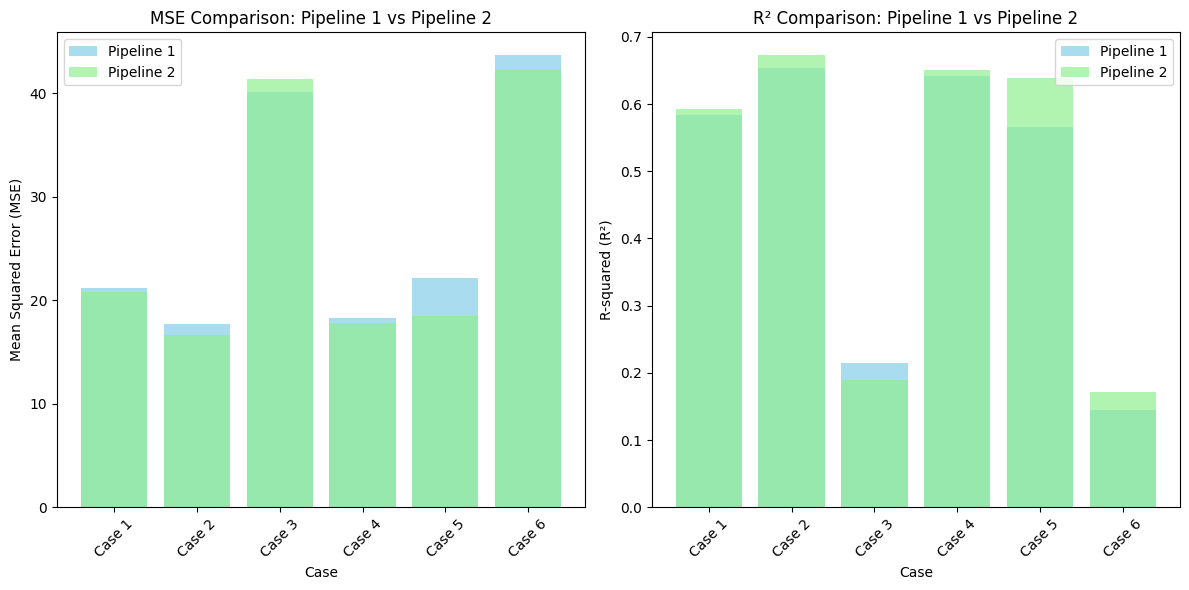

In [240]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns='mpg'), target, test_size=0.2, random_state=42)

# Dictionary to store performance metrics for both pipelines
performance_metrics = {
    "MSE": {
        "Pipeline 1": {},
        "Pipeline 2": {}
    },
    "R²": {
        "Pipeline 1": {},
        "Pipeline 2": {}
    }
}

# Loop through each case to evaluate both pipelines
for case_name, X_case in cases.items():
    print(f"Processing {case_name}...")

    # Ensure that X_case and y_train have the same number of samples by using the same indices
    X_case_train = X_case.loc[X_train.index]
    X_case_test = X_case.loc[X_test.index]

    # Pipeline 1: Imputer → StandardScaler → Linear Regression
    pipeline_1 = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])
    
    # Pipeline 2: Imputer → Polynomial Features → StandardScaler → Linear Regression
    pipeline_2 = Pipeline([
        ('imputer', SimpleImputer(strategy='mean')),
        ('poly', PolynomialFeatures(degree=3)),
        ('scaler', StandardScaler()),
        ('regressor', LinearRegression())
    ])

    # Fit and evaluate Pipeline 1
    pipeline_1.fit(X_case_train, y_train)
    y_pred_1 = pipeline_1.predict(X_case_test)
    mse_1 = mean_squared_error(y_test, y_pred_1)
    r2_1 = r2_score(y_test, y_pred_1)

    # Store results for Pipeline 1
    performance_metrics["MSE"]["Pipeline 1"][case_name] = mse_1
    performance_metrics["R²"]["Pipeline 1"][case_name] = r2_1

    # Fit and evaluate Pipeline 2
    pipeline_2.fit(X_case_train, y_train)
    y_pred_2 = pipeline_2.predict(X_case_test)
    mse_2 = mean_squared_error(y_test, y_pred_2)
    r2_2 = r2_score(y_test, y_pred_2)

    # Store results for Pipeline 2
    performance_metrics["MSE"]["Pipeline 2"][case_name] = mse_2
    performance_metrics["R²"]["Pipeline 2"][case_name] = r2_2

# Plotting the results for MSE
plt.figure(figsize=(12, 6))

# MSE comparison
plt.subplot(1, 2, 1)
plt.bar(performance_metrics["MSE"]["Pipeline 1"].keys(), performance_metrics["MSE"]["Pipeline 1"].values(), alpha=0.7, label='Pipeline 1', color='skyblue')
plt.bar(performance_metrics["MSE"]["Pipeline 2"].keys(), performance_metrics["MSE"]["Pipeline 2"].values(), alpha=0.7, label='Pipeline 2', color='lightgreen')
plt.xlabel('Case')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('MSE Comparison: Pipeline 1 vs Pipeline 2')
plt.xticks(rotation=45)
plt.legend()

# R² comparison
plt.subplot(1, 2, 2)
plt.bar(performance_metrics["R²"]["Pipeline 1"].keys(), performance_metrics["R²"]["Pipeline 1"].values(), alpha=0.7, label='Pipeline 1', color='skyblue')
plt.bar(performance_metrics["R²"]["Pipeline 2"].keys(), performance_metrics["R²"]["Pipeline 2"].values(), alpha=0.7, label='Pipeline 2', color='lightgreen')
plt.xlabel('Case')
plt.ylabel('R-squared (R²)')
plt.title('R² Comparison: Pipeline 1 vs Pipeline 2')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

### Reflection 5: 

**Which model performed better?**<br>
Pipeline 2 performed better for every case except case 3.

**How does scaling impact results?**<br>
Scaling helps the results in balancing the features to contribute equally to the model.

## Section 6. Final Thoughts & Insights

### 6.1 Summarize findings.
This analysis reviewed the UCI Mushroom dataset using 3 different models - decision tree, linear regression, and logistic regression. Six different variables were selected to determine if the variable can be used to predict if the mushroom is poisonous or edible. While all models performed well with the data, the decision tree model did the best at predicting if a mushroom is poisonous or edible.

### 6.2 Discuss challenges faced.
This dataset proved to be very challenging for me in being able to use the categorical data and to encode for the models. I would find that my code would not run properly, and I had to spend a lot of time debugging my code.

### 6.3 If you had more time, what would you try next?
If I had more time, I would like to try other variables. I am curious if there are any other variables that would present a 99% accuracy result.

### Reflection 6: 

**What did you learn from this project?**<br>
This project was very challenging for me. I learned about converting the categorical data, decoding the data, and worked on improving my debugging skills.  I was impressed to see that there were models that could predict 99% accuracy. I really did not expect to be able to get that strong of results in the analysis, and this project proved that it is possible to actually be able to make accurate predictions.